In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
#Read in dataset
from google.colab import files
uploaded = files.upload()

Saving avocado-updated-2020.csv to avocado-updated-2020.csv


In [3]:
#Assigning the dataset

avocado = pd.read_csv("avocado-updated-2020.csv")
avocado

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [4]:
#Printing unique values in "geography" to determine if they are city, state, or region

unique = avocado['geography'].unique()
unique

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [5]:
#Create a library for each level: city, state, region, total US

city = [
    'Albany', 'Atlanta', 'Boise', 'Boston',
    'Charlotte', 'Chicago', 'Columbus',
    'Denver', 'Detroit', 'Grand Rapids', 'Houston', 'Indianapolis',
    'Jacksonville', 'Las Vegas', 'Los Angeles', 'Louisville',
    'Nashville', 'New York', 'Orlando', 'Philadelphia', 'Pittsburgh',
    'Portland', 'Sacramento', 'San Diego', 'San Francisco', 'Seattle',
    'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 'Roanoke'
]

state = [
    'California', 'South Carolina'
]

region = [
    'South Central', 'Southeast',  'West', 'Great Lakes', 'Midsouth',
    'Northeast', 'Northern New England', 'Plains'
]

total_us = ['Total U.S.']

metro = ['Buffalo/Rochester', 'Cincinnati/Dayton',
    'Dallas/Ft. Worth', 'Harrisburg/Scranton', 'Hartford/Springfield',
    'Miami/Ft. Lauderdale', 'New Orleans/Mobile', 'Phoenix/Tucson',
    'Richmond/Norfolk', 'West Tex/New Mexico', 'Baltimore/Washington',
    'Baltimore/Washington']

In [6]:
#I'm organizing the data by creating booleans under the columns city, state, region, and total_us for easy
# manipulation and sorting

#Function that add 1 in the column city if the geography column has a city in it and 0 if not
def locator_city (geography):
  if geography in city:
    return 1
  else:
    return 0

#Function that add 1 in the column state if the geography column has a state in it and 0 if not
def locator_state (geography):
  if geography in state:
    return 1
  else:
    return 0

#Function that add 1 in the column region if the geography column has a region in it and 0 if not
def locator_region (geography):
  if geography in region:
    return 1
  else:
    return 0

#Function that add 1 in the column total us if the geography column has total us in it and 0 if not
def locator_us (geography):
  if geography in total_us:
    return 1
  else:
    return 0

#Function that add 1 in the column metro if the geography columns has "/" in it and 0 if not
def locator_metro (geography):
  if geography in metro:
    return 1
  else:
    return 0

avocado["city"] = avocado.apply(lambda row: locator_city(row["geography"]), axis=1)
avocado["state"] = avocado.apply(lambda row: locator_state(row["geography"]), axis=1)
avocado["region"] = avocado.apply(lambda row: locator_region(row["geography"]), axis=1)
avocado["total_us"] = avocado.apply(lambda row: locator_us(row["geography"]), axis=1)
avocado["metro"] = avocado.apply(lambda row: locator_metro(row["geography"]), axis = 1)
avocado

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,city,state,region,total_us,metro
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,1,0,0,0,0
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,1,0,0,0,0
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,1,0,0,0,0
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,1,0,0,0,0
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,0,0,0,1,0
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,0,0,1,0,0
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,0,0,1,0,0
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,0,0,0,0,1


In [7]:
#Rename columns for readability

avocado.rename(columns = {'4046':'Small HAAS', '4225':'Medium HAAS',
                              '4770':'Big HAAS', 'total_volume':'Sales'}, inplace = True)

avocado_clean = avocado
avocado_clean

,date,average_price,Sales,Small HAAS,Medium HAAS,Big HAAS,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,city,state,region,total_us,metro
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,1,0,0,0,0
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,1,0,0,0,0
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,1,0,0,0,0
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,1,0,0,0,0
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,0,0,0,1,0
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,0,0,1,0,0
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,0,0,1,0,0
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,0,0,0,0,1


3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [8]:
#Filter by only region rows, organic type, and the year 2017
avocado_region = avocado_clean[(avocado_clean['region'] == 1) &
                               (avocado_clean['type'] == 'organic') &
                               (avocado_clean['year'] == 2017)]


#Group columns by geography and drop the column Medium HAAS & Big HAAS
mylist = ['Medium HAAS', 'Big HAAS']

avocado_region_group = avocado_region.groupby(['geography']).mean()
avocado_region_group = avocado_region_group.drop(mylist, axis=1)

avocado_region_group = avocado_region_group.sort_values(by = ["Sales"], ascending = False)
avocado_region_group

<ipython-input-8-2dc1c3afe03f>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,average_price,Sales,Small HAAS,total_bags,small_bags,large_bags,xlarge_bags,year,city,state,region,total_us,metro
geography,,,,,,,,,,,,,
West,1.681698,230978.222453,35286.911132,149845.475094,67376.893774,82432.121698,36.459623,2017.0,0.0,0.0,1.0,0.0,0.0
Northeast,1.882830,221886.863019,17468.535094,151533.523585,142451.906038,9081.617547,0.000000,2017.0,0.0,0.0,1.0,0.0,0.0
Great Lakes,1.517925,168454.413962,3820.522264,102124.524528,57578.357736,44546.166792,0.000000,2017.0,0.0,0.0,1.0,0.0,0.0
South Central,1.374717,134050.404906,32398.192264,95700.252453,88669.351509,7030.900943,0.000000,2017.0,0.0,0.0,1.0,0.0,0.0
Midsouth,1.715660,132975.213396,3516.896226,84994.794717,64223.948491,20770.846226,0.000000,2017.0,0.0,0.0,1.0,0.0,0.0
Southeast,1.690189,77310.090566,5379.704528,53693.550189,36539.189434,17154.360755,0.000000,2017.0,0.0,0.0,1.0,0.0,0.0
Plains,1.719434,62769.874151,3180.818868,39113.848113,23090.547925,16022.844528,0.455660,2017.0,0.0,0.0,1.0,0.0,0.0
Northern New England,1.724717,17649.029623,23.575094,17359.426226,17149.191132,210.235094,0.000000,2017.0,0.0,0.0,1.0,0.0,0.0


As we can see on the above table, the region "West" so the most total organic, small HAAS avocado in 2017

4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [9]:


avocado_clean

avocado_clean['date'] = avocado_clean['date'].astype(str)
avocado_clean[['year', 'month', 'day']] = avocado_clean['date'].str.split('-', expand=True)


# #Converting new variables into string
avocado_clean['year'] = avocado_clean['year'].astype(str)
avocado_clean['month'] = avocado_clean['month'].astype(str)
avocado_clean['day'] = avocado_clean['day'].astype(str)

avocado_clean

,date,average_price,Sales,Small HAAS,Medium HAAS,Big HAAS,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,city,state,region,total_us,metro,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,1,0,0,0,0,01,04
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,1,0,0,0,0,01,04
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,1,0,0,0,0,01,04
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,1,0,0,0,0,01,04
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,0,0,0,0,1,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,0,0,0,1,0,11,29
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,0,0,1,0,0,11,29
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,0,0,1,0,0,11,29
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,0,0,0,0,1,11,29


In [10]:
#Group by month and sort to see what month has the highest avocado sales

avocado_month = avocado_clean.groupby(['month']).mean()
avocado_month.reset_index()

avocado_month.sort_values(by = "Sales", ascending = False)

<ipython-input-10-1ee555eacefc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,average_price,Sales,Small HAAS,Medium HAAS,Big HAAS,total_bags,small_bags,large_bags,xlarge_bags,city,state,region,total_us,metro
month,,,,,,,,,,,,,,
05,1.362226,1.123632e+06,365450.569945,322915.208484,24807.403755,410266.976481,282949.842977,118736.179386,8580.955833,0.574074,0.037037,0.148148,0.018519,0.203704
02,1.248885,1.095374e+06,356108.726586,329465.377199,27114.248681,382679.807581,257941.593086,118359.108364,6379.106130,0.574074,0.037037,0.148148,0.018519,0.203704
06,1.403636,1.051247e+06,333553.366679,292529.670089,25541.020170,398948.428058,274579.395827,112721.230545,11647.804281,0.574500,0.037064,0.148258,0.018532,0.203113
04,1.374765,1.016582e+06,328330.040096,288992.924466,23387.748900,375867.780659,263520.526179,104816.774014,7530.478686,0.574074,0.037037,0.148148,0.018519,0.203704
03,1.316207,9.957150e+05,319500.287778,280341.474979,22722.835312,373146.523045,257800.970532,109003.142239,6342.410274,0.574074,0.037037,0.148148,0.018519,0.203704
01,1.287596,9.853122e+05,308693.058179,312853.505905,22480.002184,341278.942956,234641.787819,101886.862623,4750.292514,0.574074,0.037037,0.148148,0.018519,0.203704
07,1.457877,9.832681e+05,299886.604012,286913.961481,24286.230278,372170.486228,259734.473515,101153.085415,11282.926612,0.574074,0.037037,0.148148,0.018519,0.203704
08,1.470107,9.499249e+05,293459.626250,268170.179452,20111.723497,368181.512073,254275.793565,104320.211189,9585.506962,0.574074,0.037037,0.148148,0.018519,0.203704
09,1.485673,9.064773e+05,272419.824619,258556.891759,17596.858949,357901.622625,246234.611004,104358.588974,7308.422646,0.574074,0.037037,0.148148,0.018519,0.203704


As we can see from the sorted data frame, when grouped by month, the most Sales observed is in the month of May

5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [11]:
#Filter the data to only include metro areas

avocado_metro = avocado_clean[avocado_clean["metro"] == 1]

avocado_group = avocado_metro.groupby(['geography']).mean()
avocado_sort = avocado_group.sort_values(by = 'Sales', ascending = False)
avocado_sort = avocado_sort[avocado_sort["Sales"] >= 203481.797484]
avocado_sort.reset_index()

<ipython-input-11-8a5b261f7399>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,geography,average_price,Sales,Small HAAS,Medium HAAS,Big HAAS,total_bags,small_bags,large_bags,xlarge_bags,city,state,region,total_us,metro
0,Dallas/Ft. Worth,1.076160,712751.896814,329594.576389,127929.248807,10748.742026,244479.332859,179586.615458,63310.788725,1581.920507,0.0,0.0,0.0,0.0,1.0
1,Phoenix/Tucson,1.209297,625038.257500,293964.716683,120200.269853,5727.927516,205141.899379,94151.706013,110134.888873,855.306127,0.0,0.0,0.0,0.0,1.0
2,West Tex/New Mexico,1.252972,460774.328900,228346.289360,61954.106995,15811.134319,154662.799869,93258.268259,60192.368276,1212.161691,0.0,0.0,0.0,0.0,1.0
3,Baltimore/Washington,1.474820,452229.794281,46397.389575,242720.117974,8564.812124,154547.482778,123339.006029,29665.037827,1543.432386,0.0,0.0,0.0,0.0,1.0
4,Miami/Ft. Lauderdale,1.340425,378668.053399,203481.797484,34664.439493,889.254477,139632.166503,68813.941781,69471.217092,1347.004363,0.0,0.0,0.0,0.0,1.0


In [12]:
#Filter avocado_metro by only the top 5 sales metro areas


avocado_metro_filtered = avocado_metro[(avocado_metro['geography'] == "Dallas/Ft. Worth") |
                               (avocado_metro['geography'] == "Phoenix/Tucson") |
                               (avocado_metro['geography'] == "West Tex/New Mexico") |
                               (avocado_metro['geography'] == "Baltimore/Washington") |
                               (avocado_metro['geography'] == "Miami/Ft. Lauderdale")]

avocado_metro_filtered


,date,average_price,Sales,Small HAAS,Medium HAAS,Big HAAS,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,city,state,region,total_us,metro,month,day
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,0,0,0,0,1,01,04
5,2015-01-04,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.00,organic,2015,Baltimore/Washington,0,0,0,0,1,01,04
22,2015-01-04,0.74,1086363.97,612795.80,374420.68,9817.28,89330.21,54563.33,34760.08,6.80,conventional,2015,Dallas/Ft. Worth,0,0,0,0,1,01,04
23,2015-01-04,1.35,9895.96,4634.70,1647.92,0.00,3613.34,3613.34,0.00,0.00,organic,2015,Dallas/Ft. Worth,0,0,0,0,1,01,04
48,2015-01-04,0.97,540234.22,398670.03,54844.33,39.07,86680.79,38505.18,48175.61,0.00,conventional,2015,Miami/Ft. Lauderdale,0,0,0,0,1,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32986,2020-11-29,0.96,15705.31,157.95,0.00,0.00,15547.36,14310.69,0.00,1236.67,organic,2020,Miami/Ft. Lauderdale,0,0,0,0,1,11,29
33003,2020-11-29,0.76,936684.60,309280.89,120280.85,3730.15,503392.71,222668.00,280622.22,102.49,conventional,2020,Phoenix/Tucson,0,0,0,0,1,11,29
33004,2020-11-29,1.30,24377.24,2397.86,714.68,0.00,21264.70,14368.89,6895.81,0.00,organic,2020,Phoenix/Tucson,0,0,0,0,1,11,29
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,0,0,0,0,1,11,29


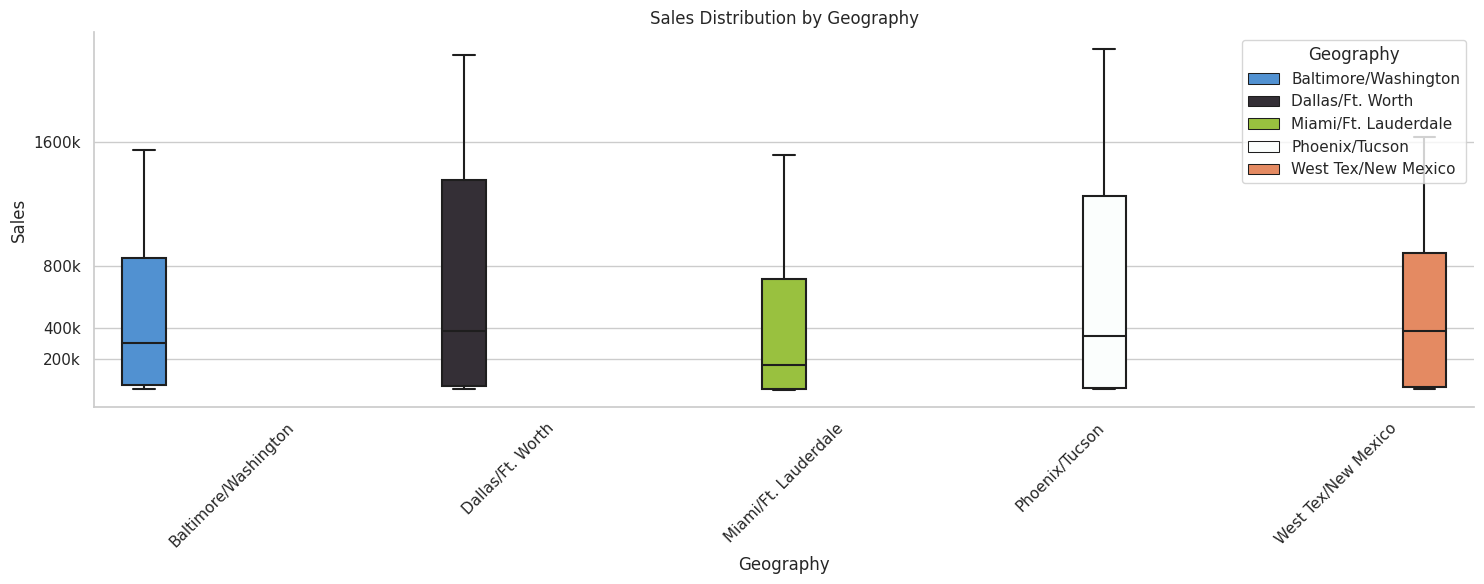

In [13]:
#Style the seaborn theme
sns.set_theme()
sns.set_style('whitegrid')
colors = ["#3C91E6", "#342E37", "#A2D729", "#FAFFFD", '#FA824C']
sns.set_palette(sns.color_palette(colors))

# Style the seaborn theme
sns.set_theme()
sns.set_style('whitegrid')
colors = ["#3C91E6", "#342E37", "#A2D729", "#FAFFFD", '#FA824C']
sns.set_palette(sns.color_palette(colors))

# Set notebook's figure size
plt.rcParams['figure.figsize'] = [15, 6]

# Create the boxplot
q1_graph = sns.boxplot(data=avocado_metro_filtered,
                      x="geography",
                      y="Sales",
                      hue="geography")

# Customize the plot
plt.title("Sales Distribution by Geography")
plt.xlabel("Geography")
plt.ylabel("Sales")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Improve legend placement
plt.legend(title="Geography", loc="upper right")

# Remove top and right spines
sns.despine()

# Set custom y-axis tick marks and labels
custom_y_ticks = [200000, 400000, 800000, 1600000]
custom_y_labels = ['200k', '400k', '800k', '1600k']

plt.yticks(custom_y_ticks, custom_y_labels)
# Show the plot
plt.tight_layout()
plt.show()

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only: Los Angeles, San Diego, Sacramento, San Francisco

In [14]:
avocado_city = avocado_clean[(avocado_clean['geography'] == "Los Angeles") |
                               (avocado_clean['geography'] == "San Diego") |
                               (avocado_clean['geography'] == "Sacramento") |
                               (avocado_clean['geography'] == "San Francisco")
                             ]

avocado_city

,date,average_price,Sales,Small HAAS,Medium HAAS,Big HAAS,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,city,state,region,total_us,metro,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,1,0,0,0,0,01,04
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,1,0,0,0,0,01,04
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,1,0,0,0,0,01,04
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,1,0,0,0,0,01,04
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,1,0,0,0,0,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento,1,0,0,0,0,11,29
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego,1,0,0,0,0,11,29
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego,1,0,0,0,0,11,29
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,1,0,0,0,0,11,29


7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [15]:
mylist = ['type', 'average_price', 'geography']

avocado_city_filtered = avocado_city[mylist]
avocado_city_filtered

,type,average_price,geography
44,conventional,0.85,Los Angeles
45,organic,1.25,Los Angeles
80,conventional,1.05,Sacramento
81,organic,1.33,Sacramento
82,conventional,0.94,San Diego
...,...,...,...
33018,organic,1.43,Sacramento
33019,conventional,1.12,San Diego
33020,organic,1.95,San Diego
33021,conventional,1.50,San Francisco


In [16]:
avocado_type = avocado_city_filtered.pivot_table(index = "geography", columns = "type", values = "average_price")
avocado_type.reset_index()

type,geography,conventional,organic
0,Los Angeles,1.047124,1.574902
1,Sacramento,1.295359,1.873856
2,San Diego,1.113856,1.798366
3,San Francisco,1.400490,2.119444


In [17]:
avocado_type['diff'] = avocado_type['organic'] - avocado_type['conventional']
avocado_type.reset_index()

type,geography,conventional,organic,diff
0,Los Angeles,1.047124,1.574902,0.527778
1,Sacramento,1.295359,1.873856,0.578497
2,San Diego,1.113856,1.798366,0.684510
3,San Francisco,1.400490,2.119444,0.718954


In [18]:
avocado_type = avocado_type.sort_values(by = "diff", ascending = False)
avocado_type.reset_index(inplace = True)
avocado_type

type,geography,conventional,organic,diff
0,San Francisco,1.400490,2.119444,0.718954
1,San Diego,1.113856,1.798366,0.684510
2,Sacramento,1.295359,1.873856,0.578497
3,Los Angeles,1.047124,1.574902,0.527778


As we can see from this sorted tables, Sanfrancisco has the most difference in price when it comes to organic avocado price vs conventional avocado price. We know that by looking at the "diff" column, which is the difference between organic and conventional prices. The "diff" column for San Francisco shows 0.71, which has the highest difference.

In [19]:
avocado_type.columns = avocado_type.columns.str.strip()
print(avocado_type.columns)

Index(['geography', 'conventional', 'organic', 'diff'], dtype='object', name='type')


Text(0, 0.5, 'Difference in type price')

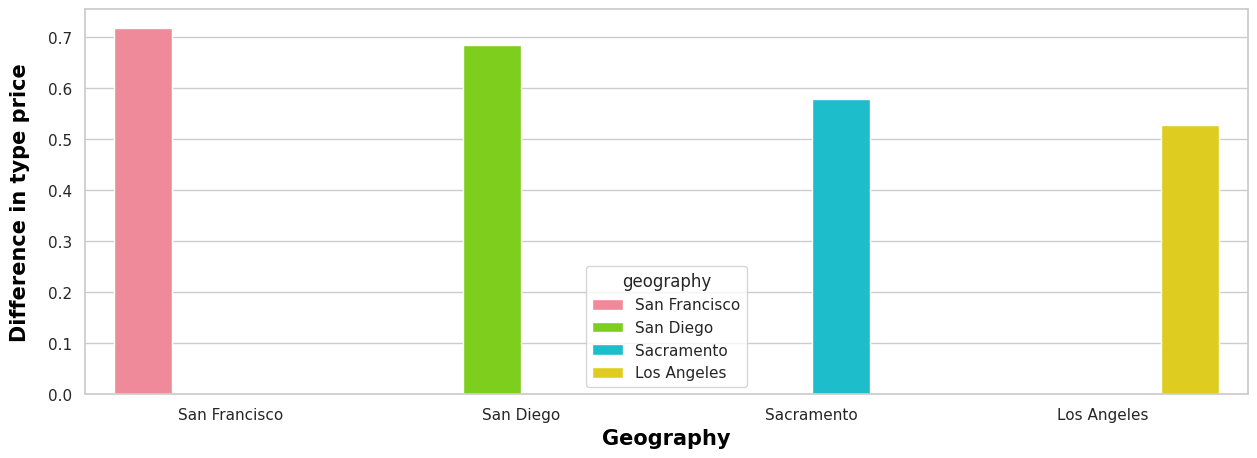

In [20]:
sns.set_theme()
sns.set_style('whitegrid')
colors = ["#FF798F", "#7FEB00", "#00D5E9", "#FFE600"]
sns.set_palette(sns.color_palette(colors))

#Set notebook's figure size
plt.rcParams['figure.figsize'] = [15, 5]

sns.barplot(avocado_type,
            x="geography",
            y="diff",
            hue = "geography"
            )

plt.xlabel("Geography",
           fontweight = "bold",
           font = "Sans Serif",
           color = "black",
           fontsize = '15',
           horizontalalignment='center')

plt.ylabel("Difference in type price",
           fontweight = "bold",
           font = "Sans Serif",
           color = "black",
           fontsize = '15',
           verticalalignment='center',
           labelpad = 20)

8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.
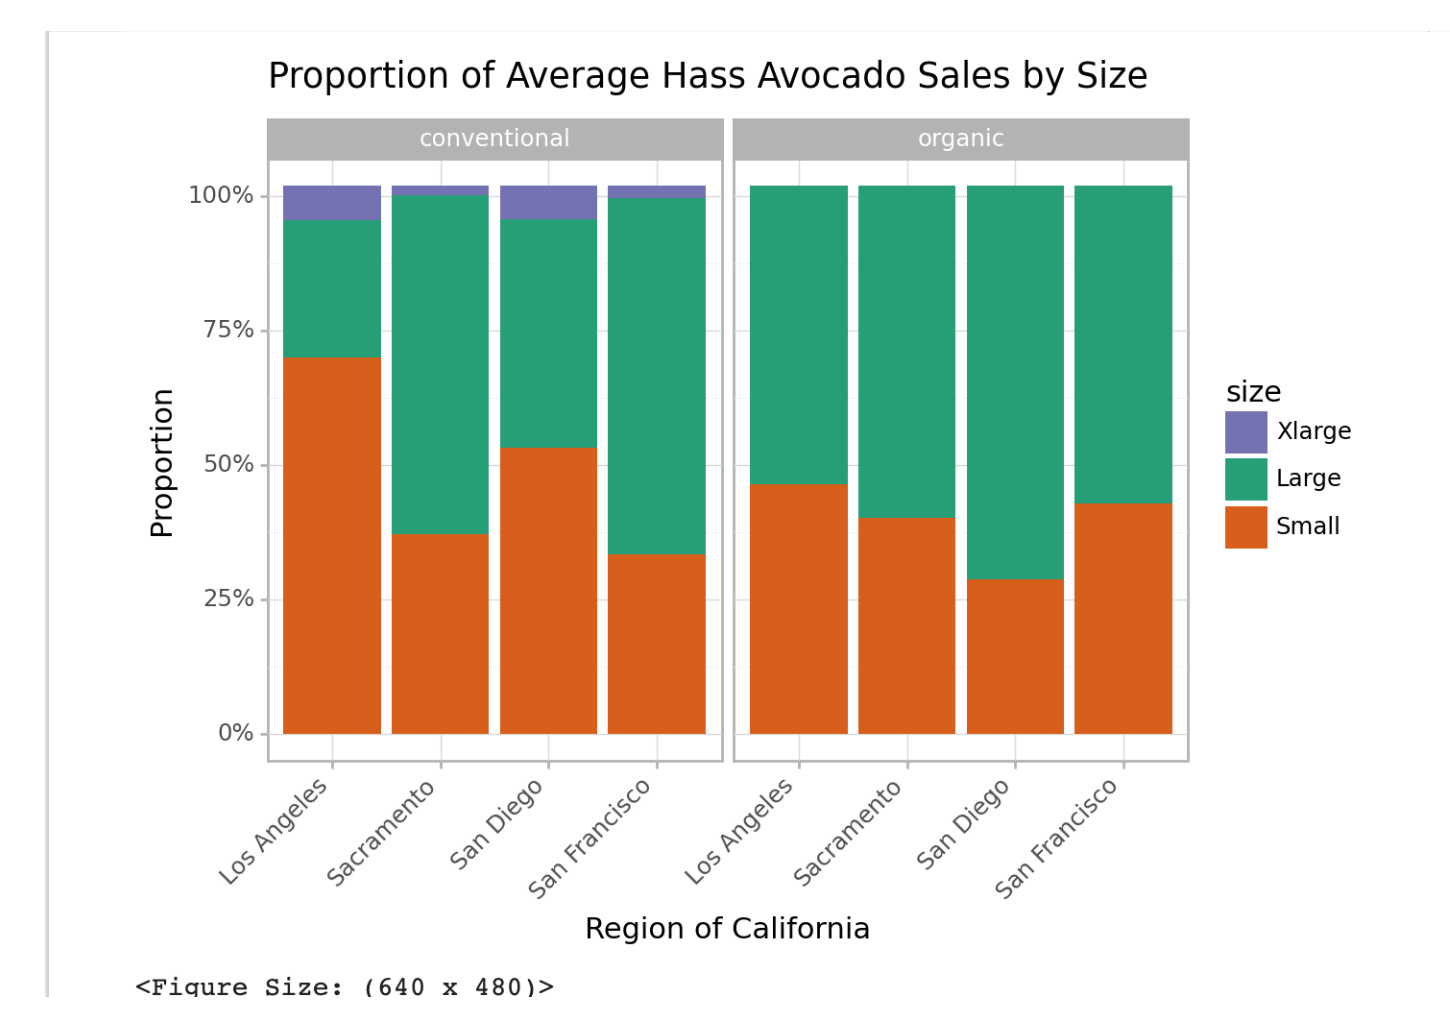


In [21]:
#First we'll need to transform the data

#I will create 2 datasets, one contains conventional price for the 4 cities in California, the other contains organic price

#Create first dataset

mylist = ['total_bags',	'small_bags',	'large_bags',	'xlarge_bags'	 , "type", "geography"]

avocado_con = avocado_clean[(avocado_clean["type"] != "organic")]
avocado_con = avocado_con[(avocado_con["geography"] == "Los Angeles") |
                                (avocado_con["geography"] == "San Diego") |
                                (avocado_con["geography"] == "Sacramento") |
                                (avocado_con["geography"] == "San Francisco")]



avocado_con = avocado_con[mylist]
avocado_con

avocado_con_long = avocado_con.groupby(['type', 'geography']).sum()

avocado_con_long.reset_index(inplace = True)
avocado_con_long

,type,geography,total_bags,small_bags,large_bags,xlarge_bags
0,conventional,Los Angeles,4.042318e+08,3.241971e+08,54762073.02,25272612.20
1,conventional,Sacramento,2.624938e+07,2.039027e+07,4779514.77,1079596.56
2,conventional,San Diego,6.936442e+07,4.972677e+07,17826707.28,1810943.70
3,conventional,San Francisco,5.557795e+07,3.515488e+07,18022074.34,2400998.73


In [22]:

#Create second dataset
mylist = ['total_bags',	'small_bags',	'large_bags',	'xlarge_bags'	 , "type", "geography"]

avocado_organic = avocado_clean[(avocado_clean["type"] == "organic")]
avocado_organic = avocado_organic[(avocado_organic["geography"] == "Los Angeles") |
                                (avocado_organic["geography"] == "San Diego") |
                                (avocado_organic["geography"] == "Sacramento") |
                                (avocado_organic["geography"] == "San Francisco")]



avocado_organic = avocado_organic[mylist]
avocado_organic




avocado_organic_long = avocado_organic.groupby(['type', 'geography']).sum()

avocado_organic_long.reset_index(inplace = True)
avocado_organic_long

# avocado_organic_long['probability'] = avocado_organic_long['Value'] / avocado_organic_long['Sales']
# avocado_organic_long

,type,geography,total_bags,small_bags,large_bags,xlarge_bags
0,organic,Los Angeles,19887804.67,15558819.60,4327893.61,1086.46
1,organic,Sacramento,1321508.24,1310133.77,11373.47,0.00
2,organic,San Diego,2896580.55,1748391.92,1148192.63,0.00
3,organic,San Francisco,4498889.83,4450626.31,48114.98,147.54


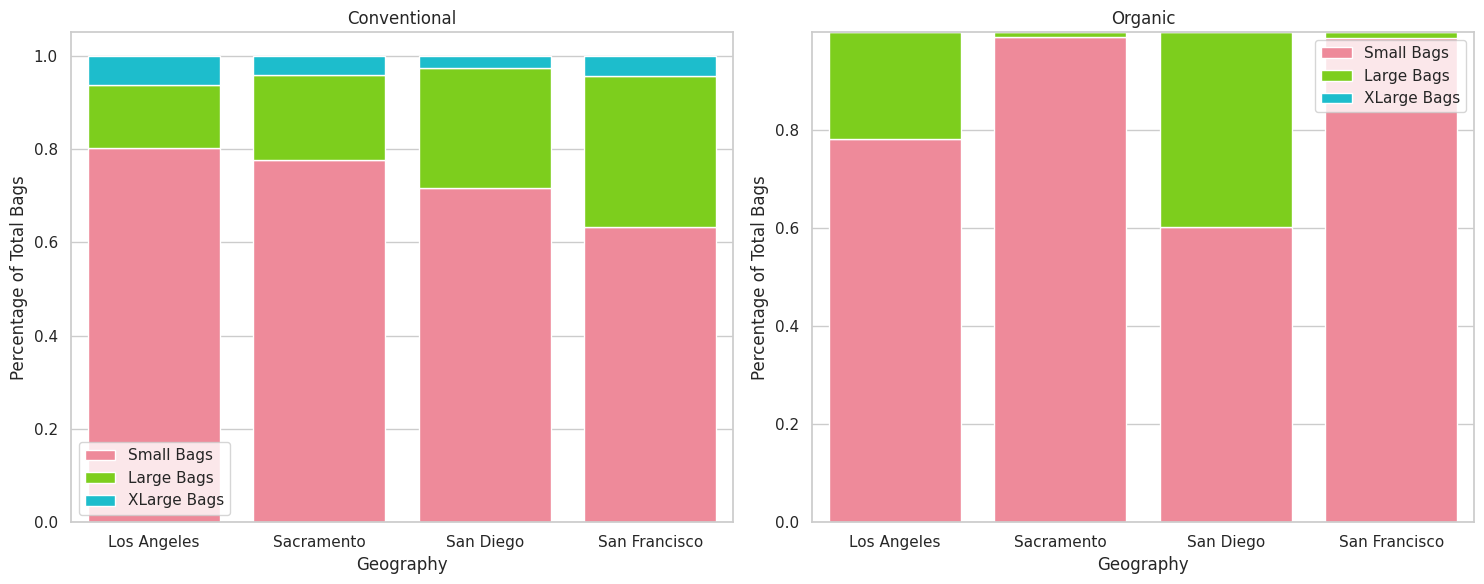

In [23]:


# Set the style before creating subplots
sns.set_style("whitegrid")

# Create subplots with two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Conventional
# Calculate proportions for Conventional
avocado_con_long['small_bags_pct'] = avocado_con_long['small_bags'] / avocado_con_long['total_bags']
avocado_con_long['large_bags_pct'] = avocado_con_long['large_bags'] / avocado_con_long['total_bags']
avocado_con_long['xlarge_bags_pct'] = avocado_con_long['xlarge_bags'] / avocado_con_long['total_bags']

# Create the stacked percentage bar plot for Conventional
sns.barplot(x="geography", y="small_bags_pct", data=avocado_con_long, color="#FF798F", label="Small Bags", ax=axes[0])
sns.barplot(x="geography", y="large_bags_pct", data=avocado_con_long, color="#7FEB00", bottom=avocado_con_long["small_bags_pct"], label="Large Bags", ax=axes[0])
sns.barplot(x="geography", y="xlarge_bags_pct", data=avocado_con_long, color="#00D5E9", bottom=avocado_con_long["small_bags_pct"] + avocado_con_long["large_bags_pct"], label="XLarge Bags", ax=axes[0])

axes[0].set_title("Conventional")
axes[0].set_xlabel("Geography")
axes[0].set_ylabel("Percentage of Total Bags")
axes[0].legend()

# Plot 2: Organic
# Calculate proportions for Organic
avocado_organic_long['small_bags_pct'] = avocado_organic_long['small_bags'] / avocado_organic_long['total_bags']
avocado_organic_long['large_bags_pct'] = avocado_organic_long['large_bags'] / avocado_organic_long['total_bags']
avocado_organic_long['xlarge_bags_pct'] = avocado_organic_long['xlarge_bags'] / avocado_organic_long['total_bags']

# Create the stacked percentage bar plot for Organic
sns.barplot(x="geography", y="small_bags_pct", data=avocado_organic_long, color="#FF798F", label="Small Bags", ax=axes[1])
sns.barplot(x="geography", y="large_bags_pct", data=avocado_organic_long, color="#7FEB00", bottom=avocado_organic_long["small_bags_pct"], label="Large Bags", ax=axes[1])
sns.barplot(x="geography", y="xlarge_bags_pct", data=avocado_organic_long, color="#00D5E9", bottom=avocado_organic_long["small_bags_pct"] + avocado_organic_long["large_bags_pct"], label="XLarge Bags", ax=axes[1])

axes[1].set_title("Organic")
axes[1].set_xlabel("Geography")
axes[1].set_ylabel("Percentage of Total Bags")
axes[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

In [24]:
avocado_type
avocado_type['average price'] = (avocado_type['organic'] + avocado_type['conventional']) / 2
avocado_type

type,geography,conventional,organic,diff,average price
0,San Francisco,1.400490,2.119444,0.718954,1.759967
1,San Diego,1.113856,1.798366,0.684510,1.456111
2,Sacramento,1.295359,1.873856,0.578497,1.584608
3,Los Angeles,1.047124,1.574902,0.527778,1.311013


In [ ]:
#Read in dataset
from google.colab import files
uploaded = files.upload()

Saving Housing Price Average.csv to Housing Price Average.csv


In [ ]:
housing_price = pd.read_csv("Housing Price Average.csv")
housing_price

,geography,housing price
0,Los Angeles,1775644
1,Sacramento,471129
2,San Diego,1539145
3,San Francisco,1978296


In [ ]:
combine = avocado_type.merge(housing_price, on=["geography"])
combine

,geography,conventional,organic,diff,average price,housing price
0,San Francisco,1.400490,2.119444,0.718954,1.759967,1978296
1,San Diego,1.113856,1.798366,0.684510,1.456111,1539145
2,Sacramento,1.295359,1.873856,0.578497,1.584608,471129
3,Los Angeles,1.047124,1.574902,0.527778,1.311013,1775644


Text(0, 0.5, 'Average Housing Price')

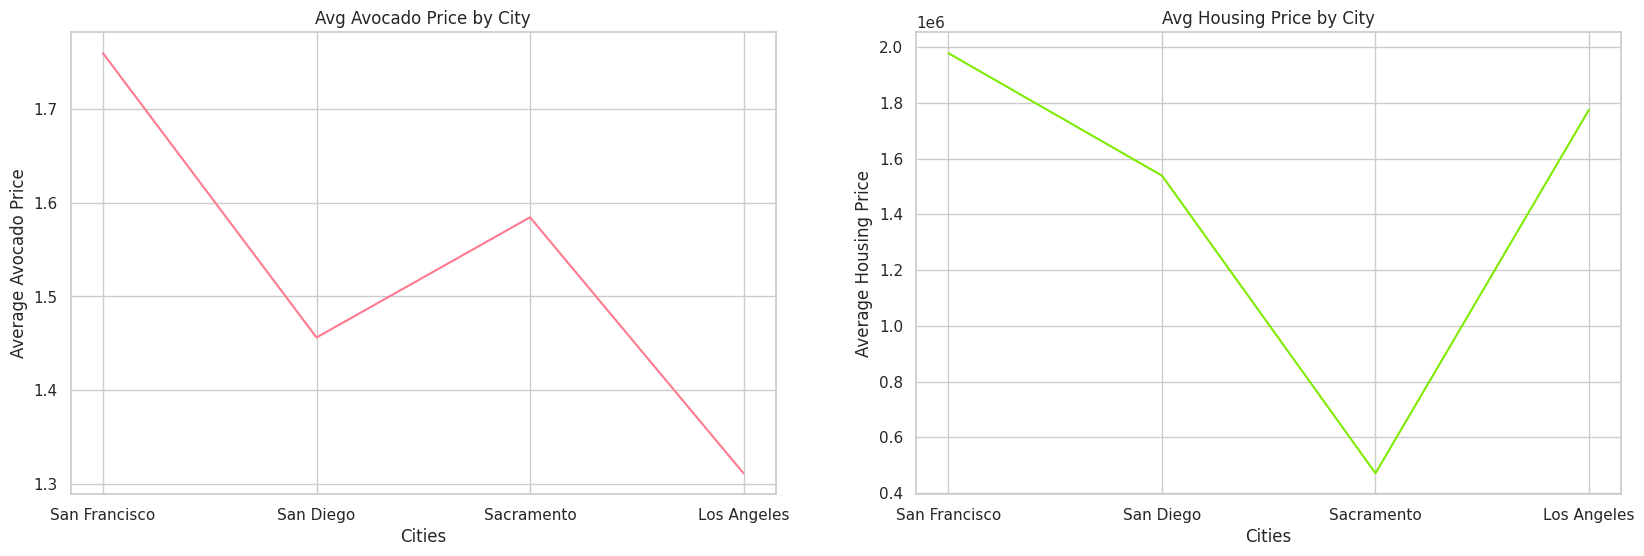

In [ ]:
# Set the style before creating subplots
sns.set_style("whitegrid")

# Create subplots with two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

#Plot 1 avocado average price

sns.lineplot(x="geography", y="average price", data=combine, color="#FF798F", ax=axes[0])
axes[0].set_title("Avg Avocado Price by City")
axes[0].set_xlabel("Cities")
axes[0].set_ylabel("Average Avocado Price")

#Plot 2 housing price

sns.lineplot(x="geography", y="housing price", data=combine, color="#7FEB00", ax=axes[1])
axes[1].set_title("Avg Housing Price by City")
axes[1].set_xlabel("Cities")
axes[1].set_ylabel("Average Housing Price")


There is no clear relationship between housing price and avcado price.

However, we can see glimpse of some relationship if we just look at San Francisco and San Diego.

As we can see, avocado price at San Francisco is the highest, which is also the case for housing price in Sanfrancisco.

Avcado price for San Diego is a bit lower, which is also the case for housing price over there.